Tutorial 6: Data Extensions
===========================

In the previous tutorial we illustrated how we can compose and fit complex models in PyAutoFit. We had full
customization of the model we composed, how it was fitted as well as options on how to visualization its results.

In this tutorial, we'll demonstrate how the `Analysis` class can be easily extended for problems with a dataset that is
more complicated than some `data` and a `noise_map`. I suspect your model-fitting problem's dataset consists of many
more components than just the data itself and the noise-map, so lets look at how we would incorporate them into
**PyAutoFit**!

To illustrate this, we will stick to our toy-model of fitting 1D datasets. However, we will now suppose that when we
acquired this data it underwent a process that effectively convolved it with a kernel of some description. Lets
take a look at such a dataset:

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autofit as af
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


Load the dataset from the `autofit_workspace/dataset` folder. 

We also load the unblurred `Gaussian` for comparison.

In [2]:
dataset_convolved_path = path.join("dataset", "example_1d", "gaussian_x1_convolved")
data_convolved = af.util.numpy_array_from_json(
    file_path=path.join(dataset_convolved_path, "data.json")
)
noise_map_convolved = af.util.numpy_array_from_json(
    file_path=path.join(dataset_convolved_path, "noise_map.json")
)

dataset_unconvolved_path = path.join("dataset", "example_1d", "gaussian_x1_unconvolved")
data_unconvolved = af.util.numpy_array_from_json(
    file_path=path.join(dataset_unconvolved_path, "data.json")
)
noise_map_unconvolved = af.util.numpy_array_from_json(
    file_path=path.join(dataset_unconvolved_path, "noise_map.json")
)

Now lets plot the convolved and unconvolved datasets.
 
To do this we use the `plot_line` convenience method fom the previous tutorial, but extend it to plot two p.

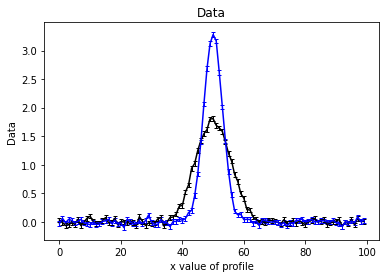

<Figure size 432x288 with 0 Axes>

In [3]:


def plot_lines(
    xvalues, line_0, line_1, errors_0=None, errors_1=None, title=None, ylabel=None
):

    plt.errorbar(
        x=xvalues,
        y=line_0,
        yerr=errors_0,
        color="k",
        ecolor="k",
        elinewidth=1,
        capsize=2,
    )
    plt.errorbar(
        x=xvalues,
        y=line_1,
        yerr=errors_1,
        color="b",
        ecolor="b",
        elinewidth=1,
        capsize=2,
    )
    plt.title(title)
    plt.xlabel("x value of profile")
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()


xvalues = np.arange(data_convolved.shape[0])

plot_lines(
    xvalues=xvalues,
    line_0=data_convolved,
    line_1=data_unconvolved,
    errors_0=noise_map_convolved,
    errors_1=noise_map_unconvolved,
    title="Data",
    ylabel="Data",
)

Finish.